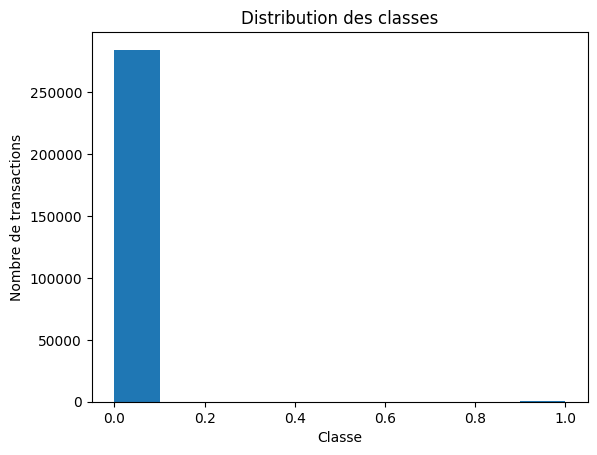

Silhouette scores :
K-means: 0.13159810630545205
DBSCAN: -0.24867983846872166
HCA: 0.3990074736551452

Calinski-Harabasz scores :
K-means: 296.482296235936
DBSCAN: 9.510336707239798
HCA: 284.8921020218764


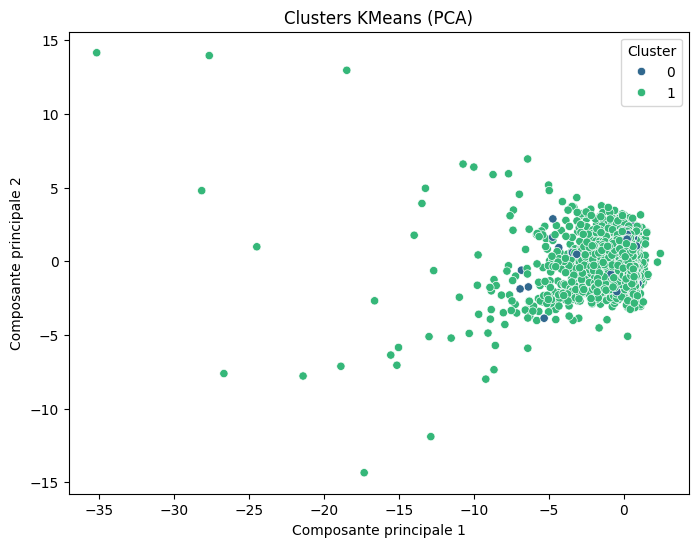

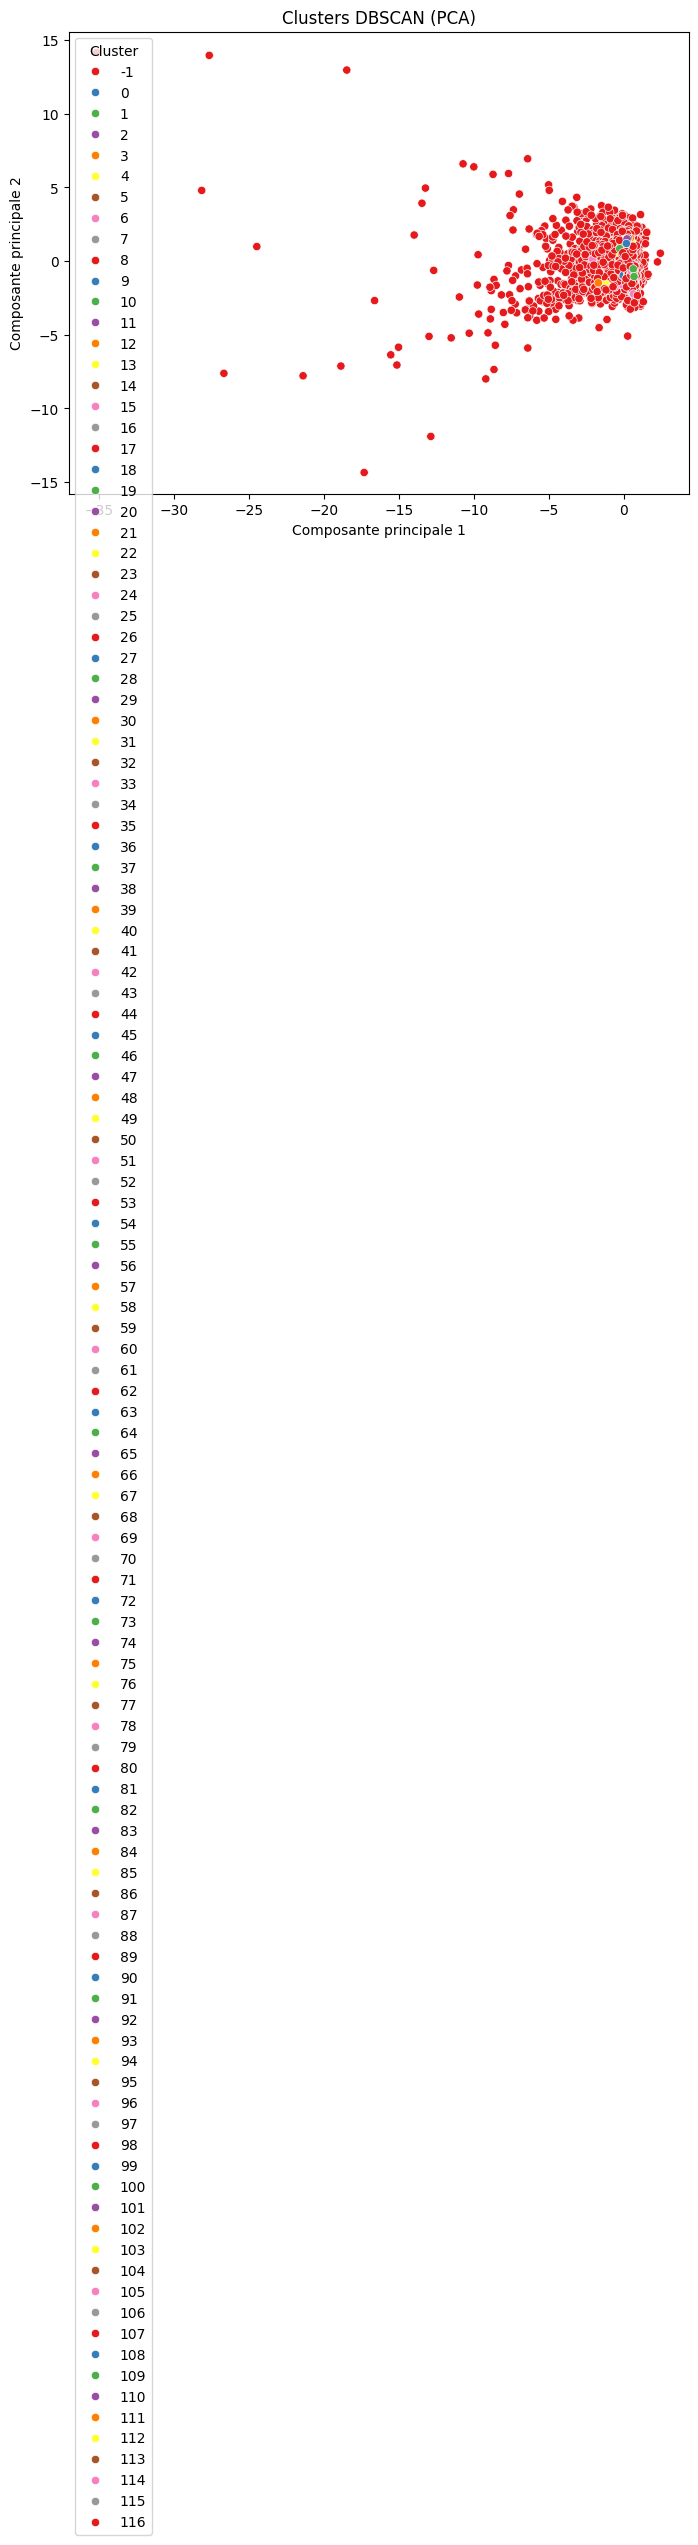

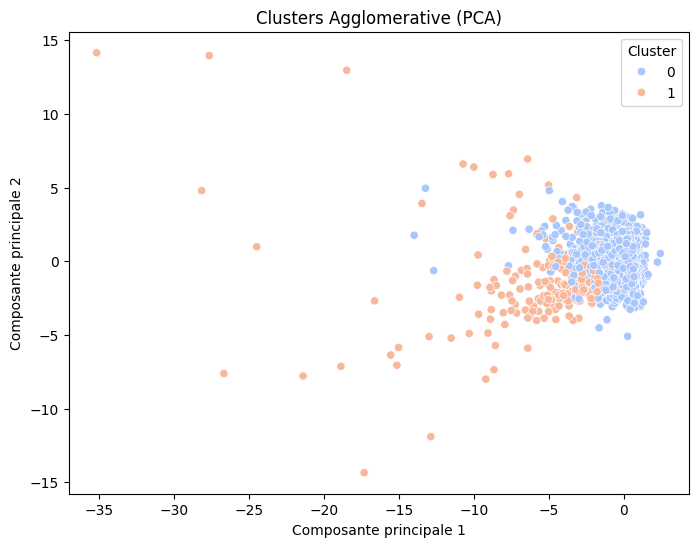

In [4]:
# Détection de fraude par carte crédit — Version optimisée 💖

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# 1. Charger le jeu de données
df = pd.read_csv("creditcard.csv")

# 2. Afficher la distribution des classes
plt.hist(df['Class'])
plt.title("Distribution des classes")
plt.xlabel("Classe")
plt.ylabel("Nombre de transactions")
plt.show()

# 3. Histogrammes des variables numériques (optionnel mais long)
# df.hist(bins=50, figsize=(20,15))
# plt.show()

# 4. Matrice de corrélation
# corr_matrix = df.corr()
# plt.matshow(corr_matrix)
# plt.title("Matrice de corrélation")
# plt.show()

# 5. Prétraitement
num_vars = ['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)]
scaler = StandardScaler()
df[num_vars] = scaler.fit_transform(df[num_vars])

# 6. Échantillonnage pour accélérer le clustering
df_sample = df.sample(n=10000, random_state=42)
X = df_sample[num_vars]

# 7. Appliquer les algorithmes de clustering

# MiniBatchKMeans (plus rapide que KMeans)
kmeans = MiniBatchKMeans(n_clusters=2, random_state=42, batch_size=1000)
kmeans.fit(X)

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # eps ajusté pour échantillon
dbscan.fit(X)

# HCA (moins coûteux sur petit échantillon)
hca = AgglomerativeClustering(n_clusters=2)
hca.fit(X)

# 8. Évaluation
print("Silhouette scores :")
print("K-means:", silhouette_score(X, kmeans.labels_))
print("DBSCAN:", silhouette_score(X, dbscan.labels_))
print("HCA:", silhouette_score(X, hca.labels_))

print("\nCalinski-Harabasz scores :")
print("K-means:", calinski_harabasz_score(X, kmeans.labels_))
print("DBSCAN:", calinski_harabasz_score(X, dbscan.labels_))
print("HCA:", calinski_harabasz_score(X, hca.labels_))

#visualisation des clusters
from sklearn.decomposition import PCA

# Réduire à 2 dimensions pour visualiser
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

import seaborn as sns
import matplotlib.pyplot as plt

# Visualiser KMeans
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans.labels_, palette="viridis")
plt.title("Clusters KMeans (PCA)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title='Cluster')
plt.show()

# Visualiser DBSCAN
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=dbscan.labels_, palette="Set1")
plt.title("Clusters DBSCAN (PCA)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title='Cluster')
plt.show()

# Visualiser HCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=hca.labels_, palette="coolwarm")
plt.title("Clusters Agglomerative (PCA)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title='Cluster')
plt.show()

Le clustering permet d'identifier des groupes de transactions similaires. En fonction de la méthode de clustering utilisée, les transactions peuvent être regroupées en différents nombres de clusters. Ensuite, il est possible d'analyser les caractéristiques des transactions dans chaque cluster pour identifier les transactions suspectes.

Par exemple, si l'on utilise K-means avec 2 clusters et qu'on observe une différence marquée entre les caractéristiques des transactions dans chaque cluster, il est possible d'identifier les transactions suspectes en examinant celles qui ont des caractéristiques très différentes de celles des autres transactions de leur cluster.